# Monte Carlo methods
Auhtor: Artur Kalinowski

## Setup the environment

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np

#HEP specific tools
import scipy.constants as scipy_constants
from particle import Particle

#Plotting libraries
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

### Probability distribution (PDF) and cumulative distribution (CDF) functions

Consider random numbers from range [0,1] distributed according to the triangle distribution:

\begin{equation}
 p(x) = 2x
\end{equation}

* plot the probability density function (PDF)
* plot the cumulative probability function (CDF)
* plot inverse of the CDF: $F^{-1}(p)$

In [20]:
#Install additional packages. Might requirte kernel restart.
#Has to be done everytime container is reatarted
! pip3 install particle

Defaulting to user installation because normal site-packages is not writeable


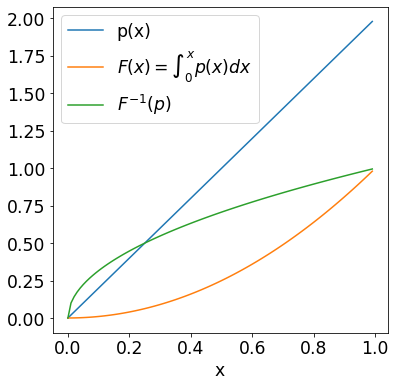

In [3]:
#probability density function
def pdf(x):
    p = np.where(np.logical_and(x>0, x<1), 2*x, 0)
    return p

#cumulative probability density function
def cdf(x):
    cdf = np.where(np.logical_and(x>0, x<1), x**2,0)
    return cdf

#inverse of probability density function
def invCDF(x):
    value = np.where(np.logical_and(x>0, x<1),np.sqrt(x),0)
    return value
    
fig, ax = plt.subplots(figsize=(6, 6))

#grid of values for function evaluation
x = np.arange(0, 1.0, 0.01)

#plot a function
ax.plot(x,pdf(x), label="p(x)");

#plot functions overlaid
ax.plot(x,cdf(x), label=r"$F(x) = \int_{0}^{x}p(x)dx$");
ax.plot(x,invCDF(x), label=r"$F^{-1}(p)$");

#set axes labels
ax.set_xlabel("x")
ax.set_ylabel("")

#plot legend
ax.legend();

### Random number generation using inverse of CDF

* generate 100k numbers from triangle distribution using the inverse of the CDF
* plot a histogram of numbers with PDF overaild 

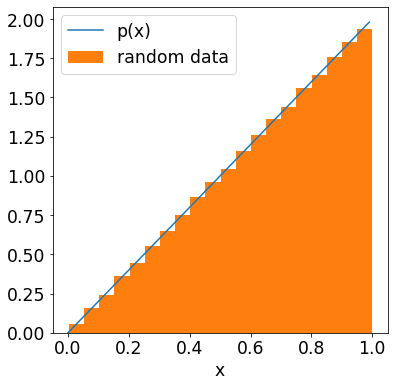

In [4]:
def drawNumbers(nPoints, invCDF):
    x = np.random.random(nPoints)
    x = invCDF(x)
    return x

fig, ax = plt.subplots(figsize=(6, 6))

x = np.arange(0,1,0.01)
nPoints = 100000
sample = drawNumbers(nPoints, invCDF)

ax.plot(x,pdf(x), label="p(x)");
ax.hist(sample, bins=20, density=True, label="random data");
ax.set_xlabel("x")
ax.set_ylabel("")
ax.legend();

**Please:**

* generate 100k numbers from $p(x) = 3x^{2}$ distribution using the inverse of the CDF
* plot a histogram of numbers with PDF overaild 

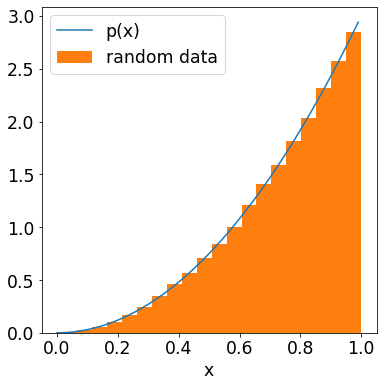

In [5]:
def pdf(x):
...
    return p
      
def cdf(x):
...
    return cdf

def invCDF(x):
...
    return value

fig, ax = plt.subplots(figsize=(6, 6))

x = np.arange(0,1,0.01)
nPoints = 100000
sample = drawNumbers(nPoints, invCDF)
...
pass

### Python modules with physical constants

Print out the values and uncerainties of:

* the Fermi constant
* muon mass
* electron mass
* define variables ```G_F```, ```m_e``` and ```m_mu``` containg only the values of relevant contants

In [6]:
G_F = scipy_constants.physical_constants["Fermi coupling constant"]
m_e = scipy_constants.physical_constants["electron mass energy equivalent in MeV"]
m_mu = scipy_constants.physical_constants["muon mass energy equivalent in MeV"]

print("Fermi constant: {} +- {} {}".format(G_F[0], G_F[2], G_F[1]))
print("muon mass: \t{} +- {} {}".format(m_mu[0], m_mu[2], m_mu[1]))
print("electron mass: \t{} +- {} {}".format(m_e[0], m_e[2], m_e[1]))

G_F = G_F[0]
m_e = m_e[0]
m_mu = m_mu[0]

Fermi constant: 1.1663787e-05 +- 6e-12 GeV^-2
muon mass: 	105.6583755 +- 2.3e-06 MeV
electron mass: 	0.51099895 +- 1.5e-10 MeV


* write a function coding the differential decay width: ```dGamma_dE(E)```
* calculate the value of the total decay width: ```Gamma_tot```
* calculate and print out the muon life time in seconds: ```tau_mu```

In [7]:
def dGamma_dE(e):
    value = G_F**2/(4.0*math.pi**3)
    value *= m_mu**2*e**2*(1 - 4.0/3.0*e/m_mu)
    return value

Gamma_tot = G_F**2*m_mu**5/(192.0*math.pi**3)

hbar = scipy_constants.physical_constants["Planck constant in eV/Hz"][0]/(2*math.pi)
...

print("Muon life time is {:3.3e} seconds".format(tau_mu))

Muon life time is 2.187e-12 seconds



* calculate (on piece of paper) the maximum electron energy in muon decay (neglecting the neutrinos mass) and assing in to variable ```e_max```
* print out the ```e_max```

In [8]:
e_max = (m_mu**2 - m_e**2)/(2.0*m_mu)
print("Maximum electron energy in muon decay (neglecting neutrino mass): {:2.3} MeV".format(e_max))

Maximum electron energy in muon decay (neglecting neutrino mass): 52.8 MeV


### Plot the probability for the electron energy

* check that the normalisation is correct - calculate numerically the integral:
\begin{equation}
\int p(E) dE
\end{equation}


Integral of p(E) is: 0.99995


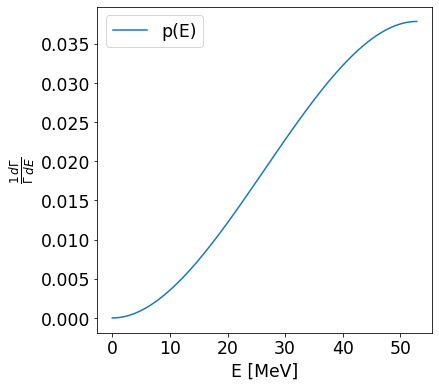

In [9]:
nPoints = 100
e = np.linspace(0.0, e_max, nPoints)
p = dGamma_dE(e)/Gamma_tot

print("Integral of p(E) is: {:1.5f}".format(np.sum(p)*e_max/nPoints))

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(e,p, label="p(E)");
ax.set_xlabel("E [MeV]")
ax.set_ylabel(r"$\frac{1}{\Gamma} \frac{d\Gamma}{dE}$")
ax.legend();

### Event generation

**Please:**

Generate ```nEvents``` energy values ("events') according to energy distribution in $\mu \rightarrow e \nu$ decay

* use "hit-or-miss method":
    1) generate energy ```nEvents``` values ('events') ```e``` from flat spectrum [0, $E_{max}$]
    2) generate random ```nEvents``` number ```x``` from flat spectrum [0,1]
    3) accept event if ```x<p(e)```
    
* what is efficiency (=what fraction of events is kept) of this method?
* How long it takes to generate 100k usefull events?
 
--- 
**Hint:**  try to use numpy array operations instead of loops. This will be much faster.  

In [10]:
%%time
...

events = events[accept]
print(colored("Number of accepted events:\t","blue"),events.shape[0])
print(colored("Accepted events fraction:\t","blue"),events.shape[0]/nEvents)

Number of accepted events:	 99678
Accepted events fraction:	 0.49839
CPU times: user 6.11 ms, sys: 651 µs, total: 6.76 ms
Wall time: 6.36 ms


**Please:**

* draw a histogram of the energy from Monte Carlo generation with p(E) overlaid

**Note:** use `density=True` option for histogram to get the probability histogram instead of event count one

Integral of p(E) is: 0.9999532221306278


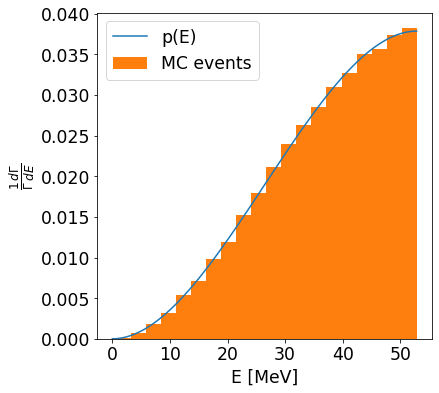

In [11]:
nPoints = 10000
e = np.linspace(0.0, e_max, nPoints)
p = dGamma_dE(e)/Gamma_tot

print(colored("Integral of p(E) is:","blue"),np.sum(p)*e_max/nPoints)

...
pass

### PASS/FAIL values generation

Define a function ```efficiency(pt, eta)``` representing some detector efficiency. 
The efficiency plateau $\epsilon_0$, and turn on $p_{T0}$ point should depend on $\eta$:

\begin{equation}
\epsilon_{0} = 0.95 - |\eta| \cdot 0.1 \\
 p_{T0} = 30 + 20 \cdot cos(\eta)
\end{equation}

Use the sigmoid function for the efficiency shape. The $p_{T}$ should be in range [0,100], and $\eta$ in [-2.5, 2.5].

In [12]:
def efficiency(pt, eta):
    shift = 30
    scale = 20
    plateau = 0.95
    
    pt0 = shift+scale*np.cos(eta)
    x = pt-pt0
    
    epsilon0 = plateau - np.abs(eta)*0.1
    return epsilon0/(1 + np.exp(-x))

* make a 1D plot for $\epsilon(p_{T}, \eta={-2, 0, 1})$
* make a 2D plot for the full map $\epsilon(p_{T}, \eta)$

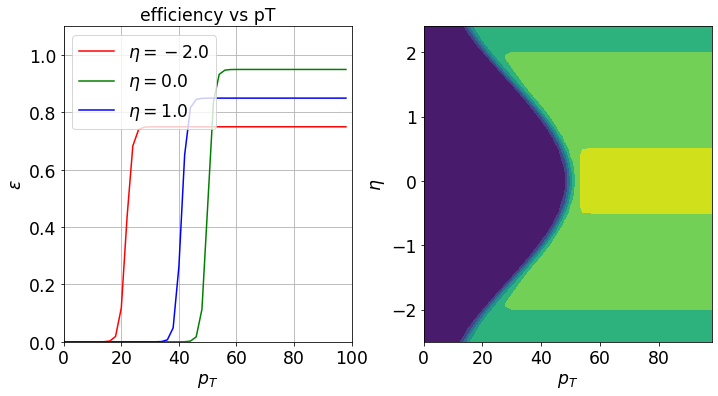

In [13]:
#grid of points for efficinecy calculation in 2D
pt = np.arange(0,100,2.0)
eta = np.arange(-2.5, 2.5, 0.1)
pt_grid, eta_grid = np.meshgrid(pt, eta)

fig, axes = plt.subplots(1, 2, figsize = (10, 6))  
axes[0].plot(pt, efficiency(pt, -2.0), "r", label = r'$\eta = -2.0$')
axes[0].plot(pt, efficiency(pt, 0.0), "g",label = r'$\eta = 0.0$')
axes[0].plot(pt, efficiency(pt, 1.0), "b",label = r'$\eta = 1.0$')

maxY = 1.1
maxX = 100
axes[0].set_ylabel(r'$\epsilon$');
axes[0].set_xlabel(r'$p_{T}$');
axes[0].grid()
axes[0].set_ylim([0,maxY])
axes[0].set_xlim([0,maxX])
axes[0].set_title("efficiency vs pT")
axes[0].legend(loc='upper left')

axes[1].contourf(pt_grid, eta_grid, efficiency(pt_grid, eta_grid))
axes[1].set_ylabel(r'$\eta$');
axes[1].set_xlabel(r'$p_{T}$');

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.25, hspace=0.35)

**Please:**

Write a function ```generateData(nPoints, efficiency)``` that generates a sample of ```nPoints``` events, with information wheter an event was accepted, according to function ```effciency(pT, eta)``` that parametrises $\epsilon$. note that ``efficiency``` argument is a **function**, not a value. 

* assume flat $p_{T}$ and $\eta$ spectrum. The $p_{T}$ should be in range [0,100], an $\eta$ in [-2.5, 2.5].
* to each $(p_{T}, \eta)$ pair assing a third variable: ```label``` randomly set to 0 or 1 according to the  ```efficiency(pt, eta)```

Implement following steps:

1) create a array of features of shape: `(nEvents,2)` from uniform distribution in range [0,1]
2) modify columns of features according to desired range
3) create ```x``` - a set of ```nEvents``` values from uniform distribution
4) create PASS/FAIL labels array according to ```x<efficiency(pt, eta)``` condition
5) return an array of  ```(features,labels)```

**Hints**:
* the labels array might require reshaping to get a column vector: 

```Python
labels = np.reshape(labels, (-1,1))

```
* final result is a concatenation of features and labels along the axis numbering the events:

```Python
np.concatenate((features,labels), axis=1)

```

In [14]:
def generateData(nPoints, efficiency):
...
    return np.concatenate((features,labels), axis=1)


#Always test your code as early as possible
def test_eff_all_fail(pt,eta):
    return 0

#Always test your code as early as possible
def test_eff_all_pass(pt,eta):
    return 1

events_all_fail = generateData(3, test_eff_all_fail)
events_all_pass = generateData(3, test_eff_all_pass)

print(colored("All fail events:","blue"))
print( events_all_fail)
print(colored("All pass events:","blue"))
print( events_all_pass)

All fail events:
[[95.36806152  1.98556159  0.        ]
 [65.64712017  0.34324031  0.        ]
 [40.87934368  1.440882    0.        ]]
All pass events:
[[16.82178854  0.91487795  1.        ]
 [65.85955442  1.50629684  1.        ]
 [43.36577428  1.54309561  1.        ]]


**Please:**

* using the ```generateData(nPoints, efficiency)``` function generate 100k events with ```(pT, eta, pass)``` informatrion
* select data rows with $|\eta|<0.1$
* further select accepted events with ```pass>0```
* calculate efficiency as a ratio of accepted to total events in bins of $p_{T}$. Use 10 bins in range ```[0, 100]```
* plot efficiency from function for $\eta=0$
* overlay efficiency from event counting from data
* do the two agree? If not exactly, then why?


**Hints:** 
* for counting number of events in bins use ```np.hist```
* for getting the bin centers use ```np.diff```

CPU times: user 119 ms, sys: 7.58 ms, total: 127 ms
Wall time: 126 ms


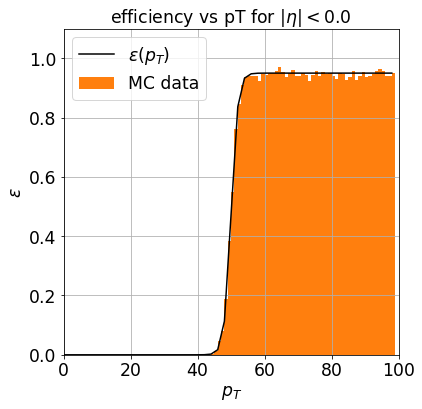

In [15]:
%%time
nPoints = 1000000
...
pass

## Energy smearing

Write a function ```smearEnergy(e, sigma)``` that smears a "true" energy according to desired relative resolution $\sigma$:

\begin{equation}
   x = \frac{\Delta{E}}{E_{true}} + 1 = \frac{E_{reco}}{E_{true}}\\
   p(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x-1)^{2}}{2\sigma^{2}}}
\end{equation}


* create a sample of 10k "events" with energy equal to ```e=10```
* create a sample with energy smeared according to ```smearEnergy(e, sigma)``` with relative resolution of 20%
* plot histograms of both datasets
* calculate the standard deviation of the relative energy difference

In [16]:
def smearEnergy(data, sigma):
    smearFactor = 1 + sigma*np.random.randn(data.shape[0])
    return data*smearFactor


data = np.array([1,1,1])
smeared_data = smearEnergy(data=data, sigma = 0.1)
print(colored("Original data:\t","blue"),data)
print(colored("Smeared data:\t","blue"),smeared_data)

Original data:	 [1 1 1]
Smeared data:	 [0.91633574 1.02124967 0.90133412]


Relative standard deviation for the smeared data: 0.20


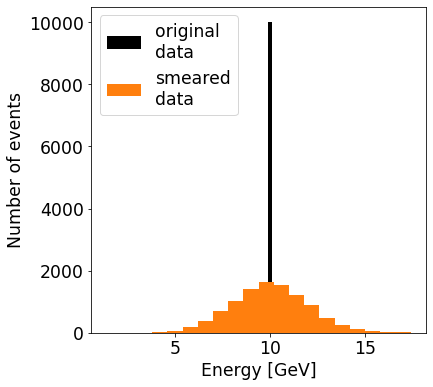

In [17]:
data = np.full(shape=10000, fill_value=10)

sigma = 0.2
smeared_data = smearEnergy(data, sigma)

fig, ax = plt.subplots(figsize = (6, 6))  
ax.hist(data, bins=5, color="black",label = 'original\ndata')
ax.hist(smeared_data, bins=20, color="#ff7f0e", label = 'smeared\ndata');
ax.legend(loc="upper left")
ax.set_ylabel("Number of events");
ax.set_xlabel("Energy [GeV]");

delta = smeared_data/data + 1
print(colored("Relative standard deviation for the smeared data: {:3.2f}","blue").format(np.std(delta)))

## Homework

Write a generator for electron - positron pairs from the Z boson decay:

$$
Z \rightarrow e^{+} e^{-}
$$

Assume the Z boson is at rest, and its mass is ditributed according to the 
non relativistic Breit-Wigner (BW) distribution with $m_{Z} = 92.1876$, $\Gamma_{Z} = 2.4952$, 
$s = E_{e^{+}} +  E_{e^{-}}$:

$$
p(s) = \frac{1}{\pi \Gamma_{Z}}\frac{\Gamma_{Z}^{2}}{(s-m_{Z})^{2} + \Gamma^{2}}
$$

* generate events with the pair energy in range ```[50,200]```
* assume the decay is isotropic. Is this a correct assumption? - check on some particle physics lecture
* generate at least 500k events. How long it takes? What is the generation effciency?
* plot histogram of the pair invariant mass with linear and log Y scales. Overlay with probability distribution for invariant mass
* plot histogram of  $cos(\theta)$ of electrons momentum. What shape is expected for isotropic distribution?
* plot histogram of transverse electron momentum: $p_{T}$. Overlay with probability distribution for transverse momentum.

**Hints:** 
* what if the division of energy between $e^{+}$ and $e^{-}$ in the Z boson rest frame?
* the probability distibution for the $p_{T}$ can be obtained from the chain rule:

\begin{equation}
\frac{d\sigma}{dp_{T}} =  \frac{d\sigma}{d\cos(\theta)} \frac{d\cos(\theta)}{dp_{T}}
\end{equation}

* use the nominal Z boson mass while calculating the $\frac{d\sigma}{dp_{T}}$.

In [18]:
def BreitWigner(s, m, gamma):
...

def generateCandidateEnergy(nPoints):
...

def generateCandidateMomenta(energy):
...
    return  p4_electron, p4_positron

def generateEvents(nPoints):
    energy = generateCandidateEnergy(nPoints)
    data = generateCandidateMomenta(energy)
    return data

def invMass(p4):
...
    return m

Generated 2541588 events for 50000000 tries.
Generation Efficiency: 0.05


<timed exec>:40: RuntimeWarning: invalid value encountered in sqrt


CPU times: user 1.68 s, sys: 1.9 s, total: 3.58 s
Wall time: 3.63 s


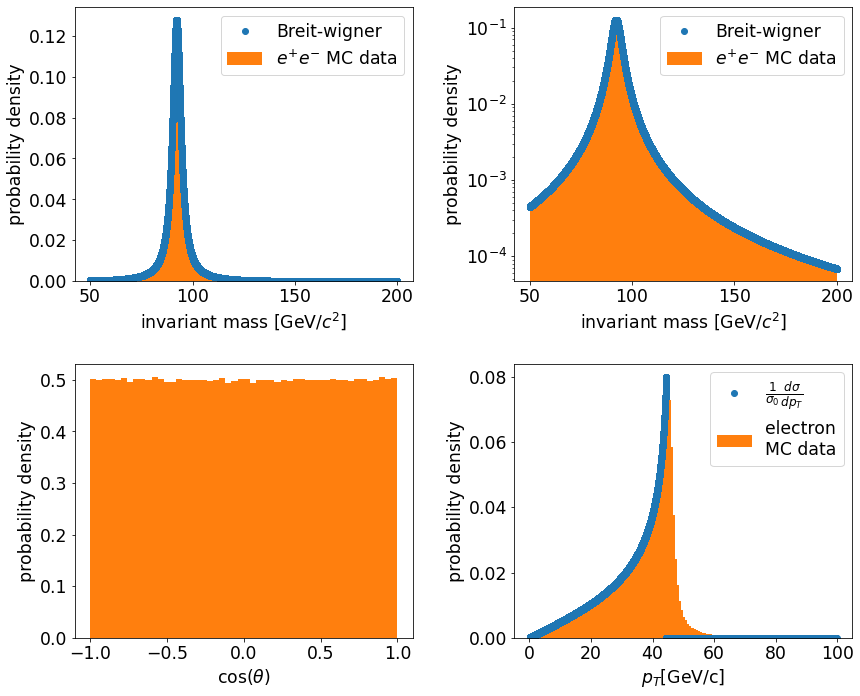

In [19]:
%%time

### Simulation parameters
minS = 50
maxS = 200

m_Z = 92.1876
gamma_Z = 2.4952

nPoints = int(5E7)
##########################

p4_electron, p4_positron = generateEvents(nPoints)
m = invMass(p4_electron + p4_positron)
print("Generated {} events for {} tries.".format(m.shape[0], nPoints))
print("Generation Efficiency: {:3.2f}".format(float(m.shape[0])/nPoints))

...
pass